In [1]:
pip install plotly==4.14.3

Note: you may need to restart the kernel to use updated packages.


In [2]:
%%time

# Common Imports:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import re

import lxml
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import RegexpTokenizer, sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import plotly.express as px

CPU times: user 2.49 s, sys: 2.22 s, total: 4.71 s
Wall time: 753 ms


In [3]:
# Imports
import pandas as pd       
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re     # Python package for regular expressions

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ubuntu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
pwd!

'/home/ubuntu/1Notebooks'

In [6]:
submits=pd.read_csv('/home/ubuntu/0Data/submits.csv')

In [7]:
submitsselftext=pd.read_csv('/home/ubuntu/0Data/submitsselftext.csv', lineterminator='\n') 

In [8]:
submits.dtypes

title                object
subreddit            object
author               object
num_comments          int64
score                 int64
timestamp            object
cleantext            object
selftextwordcount     int64
dtype: object

In [9]:
submitsselftext.dtypes

Unnamed: 0             int64
title                 object
selftext              object
subreddit             object
author                object
num_comments           int64
score                  int64
timestamp             object
cleantext             object
selftextwordcount      int64
cleantextwordcount     int64
dtype: object

In [10]:
submits.isnull().sum()

title                0
subreddit            0
author               0
num_comments         0
score                0
timestamp            0
cleantext            0
selftextwordcount    0
dtype: int64

In [11]:
submitsselftext.isnull().sum()

Unnamed: 0            0
title                 0
selftext              0
subreddit             0
author                0
num_comments          0
score                 0
timestamp             0
cleantext             0
selftextwordcount     0
cleantextwordcount    0
dtype: int64

In [12]:
submits.shape

(165672, 8)

In [13]:
submitsselftext.shape

(165672, 11)

In [14]:
submitsselftext['cleantextwordcount'] = submitsselftext['cleantext'].str.split().str.len()

In [15]:
submitsselftext.drop(columns=['Unnamed: 0'],inplace=True)

In [16]:
submitsselftext.to_csv('/home/ubuntu/0Data/submitsselftext.csv')

In [17]:
# Create dataframes for each subreddit in order to perform EDA
investsubstext = submitsselftext[submitsselftext['subreddit']=='investing']
GMEsubstext = submitsselftext[submitsselftext['subreddit']=='GME']
wsbsubstext = submitsselftext[submitsselftext['subreddit']=='wallstreetbets']
sasubstext = submitsselftext[submitsselftext['subreddit']=='SecurityAnalysis']

### What's the distribution of post lengths after removing stop words?

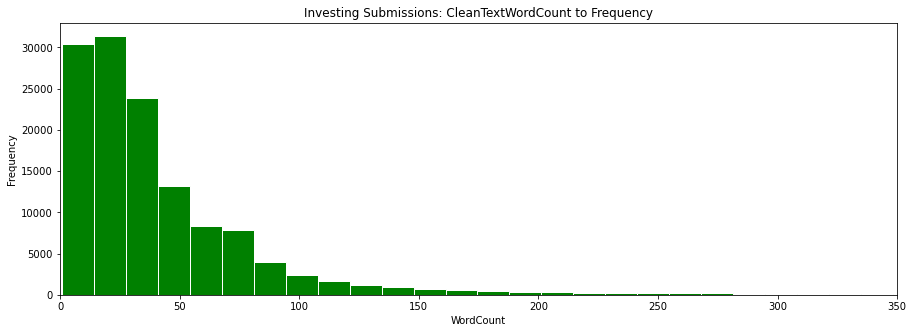

In [18]:
plt.figure(figsize = (15,5))
plt.hist(investsubstext["cleantextwordcount"],
    color = "green",
    ec = "white",
        bins=300);
plt.title("Investing Submissions: CleanTextWordCount to Frequency")
plt.xlabel("WordCount")
plt.ylabel("Frequency");
plt.xlim(0,350);

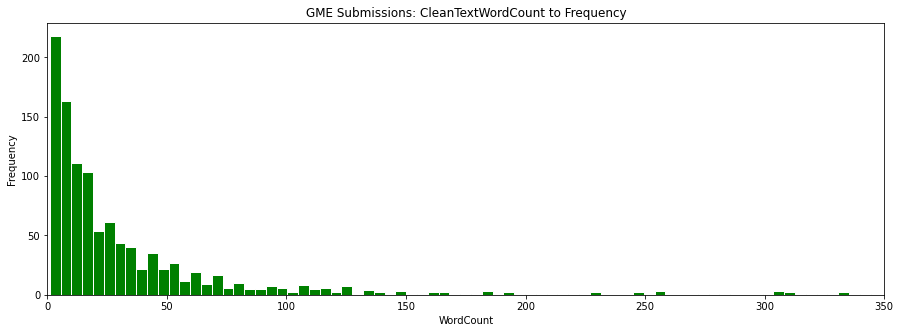

In [19]:
plt.figure(figsize = (15,5))
plt.hist(GMEsubstext["cleantextwordcount"],
    color = "green",
    ec = "white",
        bins=300);
plt.title("GME Submissions: CleanTextWordCount to Frequency")
plt.xlabel("WordCount")
plt.ylabel("Frequency");
plt.xlim(0,350);

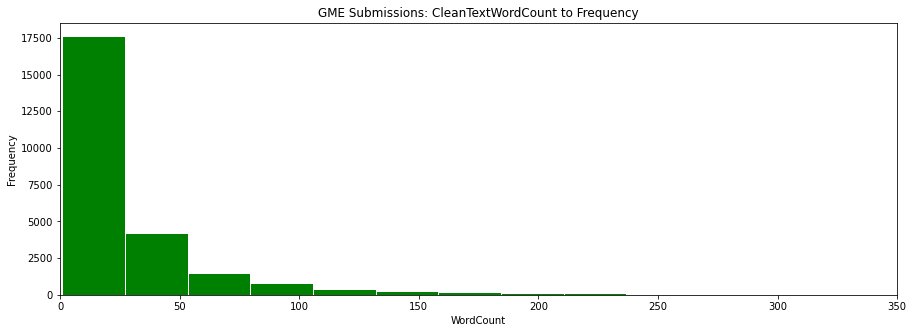

In [20]:
plt.figure(figsize = (15,5))
plt.hist(wsbsubstext["cleantextwordcount"],
    color = "green",
    ec = "white",
        bins=300);
plt.title("GME Submissions: CleanTextWordCount to Frequency")
plt.xlabel("WordCount")
plt.ylabel("Frequency");
plt.xlim(0,350);

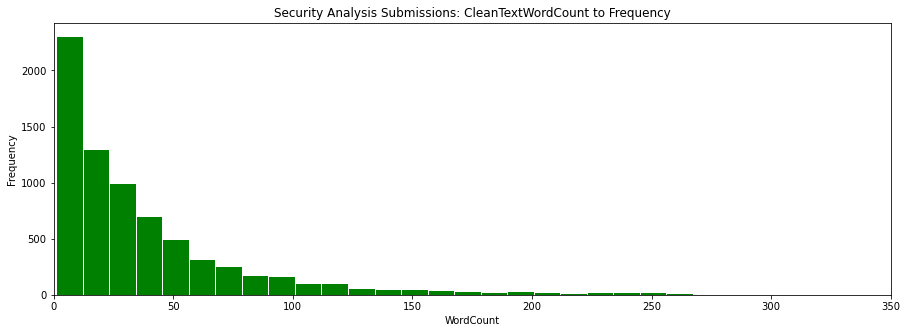

In [21]:
plt.figure(figsize = (15,5))
plt.hist(sasubstext["cleantextwordcount"],
    color = "green",
    ec = "white",
        bins=300);
plt.title("Security Analysis Submissions: CleanTextWordCount to Frequency")
plt.xlabel("WordCount")
plt.ylabel("Frequency");
plt.xlim(0,350);

In [22]:
X = investsubstext['selftext']
y = investsubstext['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)
cvec = CountVectorizer()
X_train = cvec.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train.todense(),columns=cvec.get_feature_names())
selectedfeaturesbeforestopword = X_train_df.sum().sort_values(ascending=False).head(20)

In [23]:
selectedfeaturesbeforestopword

the     388435
to      301728
and     231906
of      194012
in      172906
is      151348
it      115640
that    114548
for     113091
this     90800
you      88504
on       80404
have     78837
are      76034
my       72281
be       68967
with     65851
but      61070
what     57133
or       56813
dtype: int64

In [24]:
Xsw = investsubstext['selftext']
ysw = investsubstext['subreddit']
Xsw_train, Xsw_test, ysw_train, ysw_test = train_test_split(Xsw,ysw,test_size=0.25,stratify=y,random_state=42)
cvec = CountVectorizer(stop_words = 'english')
Xsw_train = cvec.fit_transform(Xsw_train)
Xsw_train_df = pd.DataFrame(Xsw_train.todense(),columns=cvec.get_feature_names())
selectedfeaturesafterstopword = Xsw_train_df.sum().sort_values(ascending=False).head(20)

In [25]:
selectedfeaturesafterstopword

stock        36661
com          36378
market       36176
like         34459
just         33324
money        32364
amp          30006
https        28913
investing    26233
stocks       26034
company      24730
year         23857
time         23563
www          22391
know         22283
buy          21239
years        20111
10           19194
funds        17921
price        17904
dtype: int64

<Figure size 1080x1080 with 0 Axes>

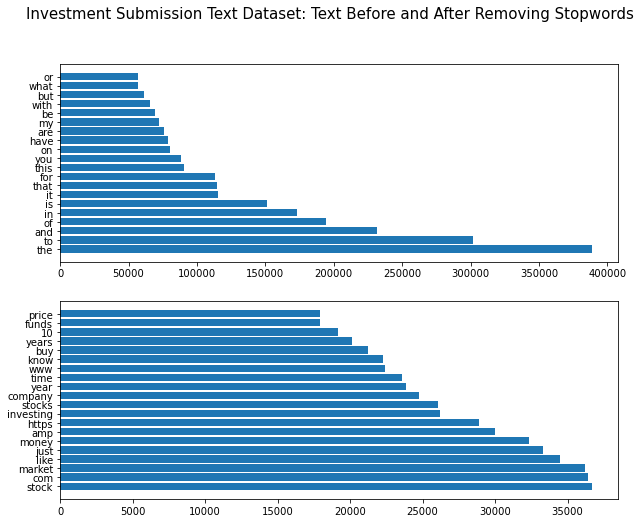

In [26]:
plt.figure(figsize = (15, 15))
temp = pd.DataFrame({"selectedfeaturesbeforestopword": selectedfeaturesbeforestopword.index,"selectedfeaturesafterstopword": selectedfeaturesafterstopword.index})
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
fig.suptitle("Investment Submission Text Dataset: Text Before and After Removing Stopwords",fontsize=15);
ax1.barh(temp.selectedfeaturesbeforestopword, selectedfeaturesbeforestopword, height=0.8)
ax2.barh(temp.selectedfeaturesafterstopword, selectedfeaturesafterstopword, height=0.8);

In [27]:
X = GMEsubstext['selftext']
y = GMEsubstext['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)
cvec = CountVectorizer()
X_train = cvec.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train.todense(),columns=cvec.get_feature_names())
selectedfeaturesbeforestopword = X_train_df.sum().sort_values(ascending=False).head(20)

In [28]:
selectedfeaturesbeforestopword

the     3767
to      2648
and     2075
of      1575
this    1106
is      1105
that    1084
it      1076
in       993
you      917
on       790
for      788
we       679
gme      642
are      640
they     629
be       604
have     548
but      521
if       517
dtype: int64

In [29]:
Xsw = GMEsubstext['selftext']
ysw = GMEsubstext['subreddit']
Xsw_train, Xsw_test, ysw_train, ysw_test = train_test_split(Xsw,ysw,test_size=0.25,stratify=y,random_state=42)
cvec = CountVectorizer(stop_words = 'english')
Xsw_train = cvec.fit_transform(Xsw_train)
Xsw_train_df = pd.DataFrame(Xsw_train.todense(),columns=cvec.get_feature_names())
selectedfeaturesafterstopword = Xsw_train_df.sum().sort_values(ascending=False).head(20)

In [30]:
selectedfeaturesafterstopword

gme        642
https      444
shares     415
com        351
just       351
short      342
amp        333
like       311
price      304
www        259
stock      251
people     231
buy        229
don        220
reddit     213
squeeze    211
know       210
market     179
time       178
money      175
dtype: int64

<Figure size 1080x1080 with 0 Axes>

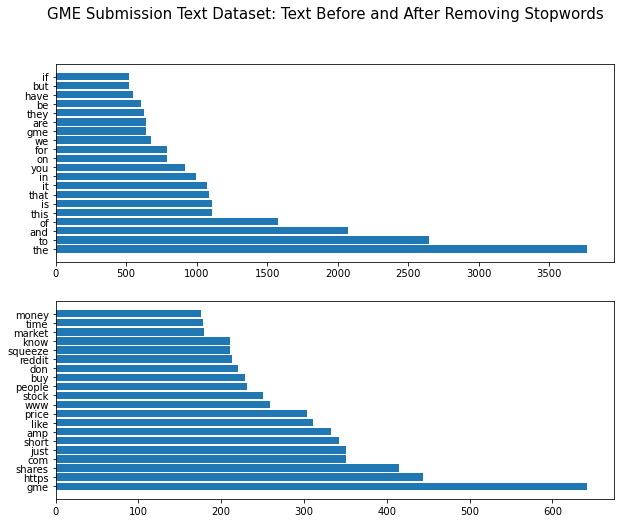

In [31]:
plt.figure(figsize = (15, 15))
temp = pd.DataFrame({"selectedfeaturesbeforestopword": selectedfeaturesbeforestopword.index,"selectedfeaturesafterstopword": selectedfeaturesafterstopword.index})
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
fig.suptitle("GME Submission Text Dataset: Text Before and After Removing Stopwords",fontsize=15)
ax1.barh(temp.selectedfeaturesbeforestopword, selectedfeaturesbeforestopword, height=0.8)
ax2.barh(temp.selectedfeaturesafterstopword, selectedfeaturesafterstopword, height=0.8);

In [32]:
X = wsbsubstext['selftext']
y = wsbsubstext['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)
cvec = CountVectorizer()
X_train = cvec.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train.todense(),columns=cvec.get_feature_names())
selectedfeaturesbeforestopword = X_train_df.sum().sort_values(ascending=False).head(20)

In [33]:
selectedfeaturesbeforestopword

the     63170
to      42414
and     34949
of      28242
in      23590
is      22410
it      18884
for     18877
this    16381
on      16271
that    15361
you     13599
at       9944
with     9746
are      9590
be       9486
have     8760
but      8700
my       7955
hodl     7863
dtype: int64

In [34]:
Xsw = wsbsubstext['selftext']
ysw = wsbsubstext['subreddit']
Xsw_train, Xsw_test, ysw_train, ysw_test = train_test_split(Xsw,ysw,test_size=0.25,stratify=y,random_state=42)
cvec = CountVectorizer(stop_words = 'english')
Xsw_train = cvec.fit_transform(Xsw_train)
Xsw_train_df = pd.DataFrame(Xsw_train.todense(),columns=cvec.get_feature_names())
selectedfeaturesafterstopword = Xsw_train_df.sum().sort_values(ascending=False).head(20)

In [35]:
selectedfeaturesafterstopword

hodl        7863
com         7848
amp         7495
https       6093
stock       5506
just        5057
market      4827
like        4803
earnings    4640
buy         3672
going       3658
www         3538
time        3529
company     3485
money       3434
gt          3002
http        2961
know        2937
price       2914
think       2881
dtype: int64

<Figure size 1080x1080 with 0 Axes>

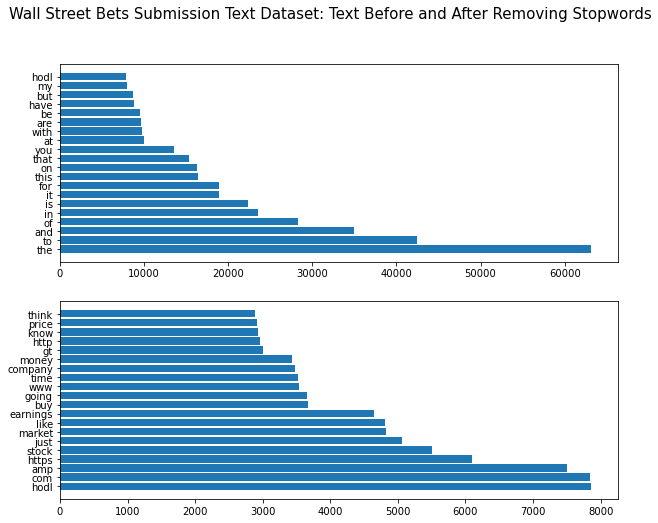

In [36]:
plt.figure(figsize = (15, 15))
temp = pd.DataFrame({"selectedfeaturesbeforestopword": selectedfeaturesbeforestopword.index,"selectedfeaturesafterstopword": selectedfeaturesafterstopword.index})
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
fig.suptitle("Wall Street Bets Submission Text Dataset: Text Before and After Removing Stopwords",fontsize=15);
ax1.barh(temp.selectedfeaturesbeforestopword, selectedfeaturesbeforestopword, height=0.8)
ax2.barh(temp.selectedfeaturesafterstopword, selectedfeaturesafterstopword, height=0.8);

In [37]:
X = sasubstext['selftext']
y = sasubstext['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)
cvec = CountVectorizer()
X_train = cvec.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train.todense(),columns=cvec.get_feature_names())
selectedfeaturesbeforestopword = X_train_df.sum().sort_values(ascending=False).head(20)

In [38]:
selectedfeaturesbeforestopword

the        30335
to         19464
of         16527
and        15747
in         12042
is         10693
that        7715
for         7688
it          6401
this        6042
on          5943
are         4559
as          4313
be          4302
have        4207
you         4065
with        4060
at          3889
but         3479
company     3323
dtype: int64

In [39]:
Xsw = sasubstext['selftext']
ysw = sasubstext['subreddit']
Xsw_train, Xsw_test, ysw_train, ysw_test = train_test_split(Xsw,ysw,test_size=0.25,stratify=y,random_state=42)
cvec = CountVectorizer(stop_words = 'english')
Xsw_train = cvec.fit_transform(Xsw_train)
Xsw_train_df = pd.DataFrame(Xsw_train.todense(),columns=cvec.get_feature_names())
selectedfeaturesafterstopword = Xsw_train_df.sum().sort_values(ascending=False).head(20)

In [40]:
selectedfeaturesafterstopword

company      3323
amp          3158
com          2848
https        2753
value        2714
market       2162
www          1897
like         1792
stock        1718
companies    1538
year         1465
cash         1454
growth       1450
just         1412
price        1410
business     1367
share        1240
years        1220
time         1202
know         1153
dtype: int64

<Figure size 1080x1080 with 0 Axes>

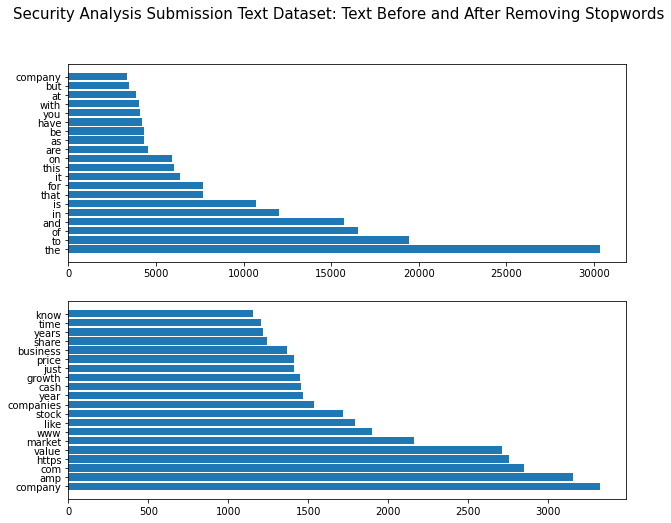

In [41]:
plt.figure(figsize = (15, 15))
temp = pd.DataFrame({"selectedfeaturesbeforestopword": selectedfeaturesbeforestopword.index,"selectedfeaturesafterstopword": selectedfeaturesafterstopword.index})
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
fig.suptitle("Security Analysis Submission Text Dataset: Text Before and After Removing Stopwords",fontsize=15);
ax1.barh(temp.selectedfeaturesbeforestopword, selectedfeaturesbeforestopword, height=0.8)
ax2.barh(temp.selectedfeaturesafterstopword, selectedfeaturesafterstopword, height=0.8);

In [42]:
newstopwords = ['https', 'www','com','10','just','don','year','time']

In [43]:
newstopwords = pd.DataFrame(newstopwords)

In [44]:
newstopwords.to_csv('/home/ubuntu/0Data/newstopwords',index=False)

# Sentiment Analysis

In [45]:
# Instantiate Sentiment Intensity Analyzer
sentiment = SentimentIntensityAnalyzer()

In [46]:
submitsselftext.head(0)

Empty DataFrame
Columns: [title, selftext, subreddit, author, num_comments, score, timestamp, cleantext, selftextwordcount, cleantextwordcount]
Index: []

In [47]:
temp=submitsselftext[0:10]

sentiments = []    

for row in temp['selftext'][0:10]:
    scores = sentiment.polarity_scores(str(row))
    #scores['selftext'] = row
    sentiments.append(scores)
    
dataset = pd.DataFrame(sentiments)

scoring = pd.merge(left=temp,
              right = dataset,
              left_on=temp.index,
              right_on=dataset.index,
              how='left')
scoring.drop(columns=['key_0'],inplace=True)

scoring.head(10)

title  \
0                   Vanguard's poor ESG track record   
1  Daily Advice Thread - All basic help or advice...   
2  Daily General Discussion and spitballin thread...   
3     Comparing 2000 to today and potential outcomes   
4              Good Rx (GDRX) - is a GOOD investment   
5  $BBKCF - BIGG Digital Assets. Crypto Stock Wit...   
6                         Timing the market strategy   
7  Why I think Mohawk Group Holdings ($MWK) is a ...   
8  Margin debt is highest on record. Hedge fund g...   
9  Chasing Returns hurts institutional and retail...   

                                            selftext  subreddit  \
0  I know there's a huge consensus for vanguard f...  investing   
1  If your question is "I have $10,000, what do I...  investing   
2  Have a general question?  Want to offer some c...  investing   
3  I have not seen many people who look into patt...  investing   
4  On Friday (3/12/2021) GDRX fell sharply, at on...  investing   
5  \nBefore I start, I’m not a financial advisor!...  investing   
6  Everyone says to not time the market but in re...  investing   
7  Mohawk Group Holdings is a small cap (1B) AI e...  investing   
8  [https://www.pairagraph.com/dialogue/3b8e49dbd...  investing   
9  &gt;Strong past returns get the attention of i...  investing   

            author  num_comments  score   timestamp  \
0          Dazen91            15      1  2021-03-14   
1    AutoModerator           160      1  2021-03-14   
2    AutoModerator           293      1  2021-03-14   
3   politiksnubben            32      1  2021-03-14   
4    pandatears420            27      1  2021-03-14   
5     SpaceTraderB             7      1  2021-03-14   
6  hugh_g_reckshon            31      1  2021-03-14   
7  midnighttyph00n            52      0  2021-03-14   
8      calmeagle11            10      1  2021-03-14   
9   Erland_Brynjar             3      1  2021-03-14   

                                           cleantext  selftextwordcount  \
0  know theres huge consensus vanguard funds low ...                129   
1  question advice personal situation questions i...                191   
2  general question want offer commentary markets...                136   
3  seen people look patterns quite astonished pat...                341   
4  friday gdrx fell sharply point close ended clo...                293   
5  start im financial advisor summary far crypto ...                792   
6  says time market regards pulling money buy dip...                127   
7  mohawk group holdings small cap b ai enabled c...                763   
8  wwwpairagraphcomdialoguebedbdddacccffwwwpairag...                447   
9  gtstrong past returns attention investors incr...                123   

   cleantextwordcount    neg    neu    pos  compound  
0                  56  0.069  0.771  0.160    0.8965  
1                  76  0.023  0.889  0.088    0.9053  
2                  60  0.000  0.851  0.149    0.9573  
3                 142  0.047  0.870  0.083    0.9179  
4                 129  0.073  0.746  0.181    0.9901  
5                 429  0.029  0.846  0.125    0.9966  
6                  49  0.080  0.803  0.118    0.7469  
7                 356  0.022  0.881  0.097    0.9899  
8                 212  0.094  0.832  0.074   -0.8334  
9                  63  0.032  0.916  0.052    0.3740

In [48]:
sentiments = []    

for row in submitsselftext['selftext']:
    scoring = sentiment.polarity_scores(str(row))
    sentiments.append(scoring)

scoringdata = pd.DataFrame(sentiments)
scoringdata.shape

submissions = pd.merge(left=submitsselftext,
              right = scoringdata,
              left_on=submitsselftext.index,
              right_on=scoringdata.index,
              how='left')

submissions.drop(columns=['key_0'],inplace=True)

submissions.head(1)

title  \
0  Vanguard's poor ESG track record   

                                            selftext  subreddit   author  \
0  I know there's a huge consensus for vanguard f...  investing  Dazen91   

   num_comments  score   timestamp  \
0            15      1  2021-03-14   

                                           cleantext  selftextwordcount  \
0  know theres huge consensus vanguard funds low ...                129   

   cleantextwordcount    neg    neu   pos  compound  
0                  56  0.069  0.771  0.16    0.8965

In [49]:
%%time
sentiments2 = []    

for row in submitsselftext['cleantext']:
    scoring2 = sentiment.polarity_scores(str(row))
    sentiments2.append(scoring2)

scoringdata2 = pd.DataFrame(sentiments2)
scoringdata2.shape

CPU times: user 1min 9s, sys: 152 ms, total: 1min 9s
Wall time: 1min 9s


(165672, 4)

In [50]:
scoringdata2.head(1)

neg    neu    pos  compound
0  0.098  0.571  0.331    0.9382

In [51]:
scoringdata2.rename(columns={'neg':'cleantextnegative',
                             'neu':'cleantextneutral',
                             'pos':'cleantextpositive',
                             'compound':'cleantextcompound'},inplace=True)

In [52]:
submitsselftext.shape

(165672, 10)

In [53]:
submissions1 = pd.merge(left=submissions,
              right = scoringdata2,
              left_on=submissions.index,
              right_on=scoringdata2.index,
              how='left')

#submission.drop(columns=['key_0'],inplace=True)

# Change order of features for interpretability

In [54]:
submissions1.head(1)

key_0                             title  \
0      0  Vanguard's poor ESG track record   

                                            selftext  subreddit   author  \
0  I know there's a huge consensus for vanguard f...  investing  Dazen91   

   num_comments  score   timestamp  \
0            15      1  2021-03-14   

                                           cleantext  selftextwordcount  \
0  know theres huge consensus vanguard funds low ...                129   

   cleantextwordcount    neg    neu   pos  compound  cleantextnegative  \
0                  56  0.069  0.771  0.16    0.8965              0.098   

   cleantextneutral  cleantextpositive  cleantextcompound  
0             0.571              0.331             0.9382

In [55]:
submissions1 = submissions1[['timestamp','title', 'subreddit', 'author', 'num_comments','score','selftext','selftextwordcount','neg','neu','pos','compound', 'cleantext', 'cleantextwordcount', 'cleantextnegative','cleantextneutral','cleantextpositive','cleantextcompound']]

submissions1.head(2)

timestamp                                              title  subreddit  \
0  2021-03-14                   Vanguard's poor ESG track record  investing   
1  2021-03-14  Daily Advice Thread - All basic help or advice...  investing   

          author  num_comments  score  \
0        Dazen91            15      1   
1  AutoModerator           160      1   

                                            selftext  selftextwordcount  \
0  I know there's a huge consensus for vanguard f...                129   
1  If your question is "I have $10,000, what do I...                191   

     neg    neu    pos  compound  \
0  0.069  0.771  0.160    0.8965   
1  0.023  0.889  0.088    0.9053   

                                           cleantext  cleantextwordcount  \
0  know theres huge consensus vanguard funds low ...                  56   
1  question advice personal situation questions i...                  76   

   cleantextnegative  cleantextneutral  cleantextpositive  cleantextcompound  
0              0.098             0.571              0.331             0.9382  
1              0.051             0.781              0.169             0.8519

In [56]:
submissions1.rename(columns={'score':'redditscore',
                             
                             'neg':'selftextnegative',
                             'neu':'selftextneutral',
                             'pos':'selftextpositive',
                             'compound':'selftextcompound'},inplace=True)

In [57]:
submissions1.head(0)

Empty DataFrame
Columns: [timestamp, title, subreddit, author, num_comments, redditscore, selftext, selftextwordcount, selftextnegative, selftextneutral, selftextpositive, selftextcompound, cleantext, cleantextwordcount, cleantextnegative, cleantextneutral, cleantextpositive, cleantextcompound]
Index: []

In [58]:
submissions1.to_csv('/home/ubuntu/0Data/submissionswithsentiment.csv',index=True)

In [59]:
submissionsselftextsentiment=submissions1[['timestamp','title', 'subreddit', 'author', 'num_comments','redditscore','selftext','selftextwordcount','selftextnegative','selftextneutral','selftextpositive','selftextcompound']]

In [60]:
submissionscleantextsentiment=submissions1[['timestamp','title', 'subreddit', 'author', 'num_comments','redditscore','selftext','selftextwordcount','cleantext','cleantextwordcount','cleantextnegative','cleantextneutral','cleantextpositive','cleantextcompound']]

In [61]:
submissionsselftextsentiment.to_csv('/home/ubuntu/0Data/submissionsSELFtextsentiment.csv',index=True)

In [62]:
submissionscleantextsentiment.to_csv('/home/ubuntu/0Data/submissionsCLEANtextsentiment.csv',index=True)

In [63]:
subselftextsent = submissionsselftextsentiment.copy()

In [64]:
subcleantextsent = submissionscleantextsentiment.copy()

In [65]:
subselftextsent['timestamp'] = pd.to_datetime(subselftextsent['timestamp'])

In [66]:
subselftextsent.dtypes

timestamp            datetime64[ns]
title                        object
subreddit                    object
author                       object
num_comments                  int64
redditscore                   int64
selftext                     object
selftextwordcount             int64
selftextnegative            float64
selftextneutral             float64
selftextpositive            float64
selftextcompound            float64
dtype: object

In [67]:
subselftextsent['date'] = subselftextsent['timestamp'].dt.date

In [68]:
subselftextsentbydate = subselftextsent.groupby([subselftextsent['timestamp'].dt.date]).mean()

In [69]:
subselftextsentbydate.to_csv('/home/ubuntu/0Data/subselftextsentbydate.csv')

In [70]:
subselftextsentbydate.head()

num_comments  redditscore  selftextwordcount  selftextnegative  \
timestamp                                                                    
2012-12-27      8.117647     2.588235          62.823529          0.061882   
2012-12-28      7.000000     6.555556         110.666667          0.030722   
2012-12-29     13.363636     4.636364         154.181818          0.068909   
2012-12-30     12.071429     4.071429          86.642857          0.048071   
2012-12-31     19.363636     5.636364          89.590909          0.034227   

            selftextneutral  selftextpositive  selftextcompound  
timestamp                                                        
2012-12-27         0.815824          0.122294          0.368947  
2012-12-28         0.870833          0.098500          0.596444  
2012-12-29         0.814455          0.116636          0.376118  
2012-12-30         0.828714          0.123214          0.303021  
2012-12-31         0.827591          0.138273          0.647650

In [71]:
days = len(subselftextsentbydate)
print("Total Days in Dataset:", days)

Total Days in Dataset: 2995


In [72]:
documentcount = len(submissions1)
print(f'On Average, there are {documentcount/days} posts per day accross 4 subreddits.')

On Average, there are 55.31619365609349 posts per day accross 4 subreddits.


In [73]:
subselftextsentbydate.describe()

num_comments  redditscore  selftextwordcount  selftextnegative  \
count   2995.000000  2995.000000        2995.000000       2995.000000   
mean      23.177100    15.325170         104.229611          0.046006   
std       28.581223    24.872158          37.778672          0.011772   
min        1.190000     0.884615          39.545455          0.006450   
25%       13.910428     4.918222          81.267316          0.038127   
50%       18.367347    10.636364          95.384615          0.045033   
75%       24.555556    19.226827         116.319190          0.052775   
max      986.714286   729.200000         537.000000          0.162000   

       selftextneutral  selftextpositive  selftextcompound  
count      2995.000000       2995.000000       2995.000000  
mean          0.841344          0.112589          0.395559  
std           0.017259          0.015667          0.115446  
min           0.699000          0.014300         -0.581500  
25%           0.831042          0.102673          0.318722  
50%           0.841508          0.111918          0.390062  
75%           0.852358          0.121526          0.466831  
max           0.979200          0.207545          0.905300

In [74]:
subcleantextsent.dtypes

timestamp              object
title                  object
subreddit              object
author                 object
num_comments            int64
redditscore             int64
selftext               object
selftextwordcount       int64
cleantext              object
cleantextwordcount      int64
cleantextnegative     float64
cleantextneutral      float64
cleantextpositive     float64
cleantextcompound     float64
dtype: object

In [75]:
subcleantextsent['timestamp'] = pd.to_datetime(subcleantextsent['timestamp'])

In [76]:
subcleantextsent.shape

(165672, 14)

In [77]:
subcleantextsent['date'] = subcleantextsent['timestamp'].dt.date

In [78]:
subcleantextsentbydate = subcleantextsent.groupby([subcleantextsent['timestamp'].dt.date]).mean()

In [79]:
subcleantextsentbydate.isnull().sum()

num_comments          0
redditscore           0
selftextwordcount     0
cleantextwordcount    0
cleantextnegative     0
cleantextneutral      0
cleantextpositive     0
cleantextcompound     0
dtype: int64

In [80]:
subcleantextsentbydate.to_csv('/home/ubuntu/0Data/cleantextsentimentdatabydate.csv')

In [81]:
subselftextsentbydate.head()

num_comments  redditscore  selftextwordcount  selftextnegative  \
timestamp                                                                    
2012-12-27      8.117647     2.588235          62.823529          0.061882   
2012-12-28      7.000000     6.555556         110.666667          0.030722   
2012-12-29     13.363636     4.636364         154.181818          0.068909   
2012-12-30     12.071429     4.071429          86.642857          0.048071   
2012-12-31     19.363636     5.636364          89.590909          0.034227   

            selftextneutral  selftextpositive  selftextcompound  
timestamp                                                        
2012-12-27         0.815824          0.122294          0.368947  
2012-12-28         0.870833          0.098500          0.596444  
2012-12-29         0.814455          0.116636          0.376118  
2012-12-30         0.828714          0.123214          0.303021  
2012-12-31         0.827591          0.138273          0.647650

In [82]:
subcleantextsentbydate.head()

num_comments  redditscore  selftextwordcount  cleantextwordcount  \
timestamp                                                                      
2012-12-27      8.117647     2.588235          62.823529           26.529412   
2012-12-28      7.000000     6.555556         110.666667           46.166667   
2012-12-29     13.363636     4.636364         154.181818           63.909091   
2012-12-30     12.071429     4.071429          86.642857           36.785714   
2012-12-31     19.363636     5.636364          89.590909           41.500000   

            cleantextnegative  cleantextneutral  cleantextpositive  \
timestamp                                                            
2012-12-27           0.117588          0.692235           0.190235   
2012-12-28           0.066944          0.771167           0.161944   
2012-12-29           0.119091          0.670091           0.211091   
2012-12-30           0.077857          0.727000           0.195143   
2012-12-31           0.043227          0.727318           0.229500   

            cleantextcompound  
timestamp                      
2012-12-27           0.289018  
2012-12-28           0.445311  
2012-12-29           0.400264  
2012-12-30           0.367550  
2012-12-31           0.646577

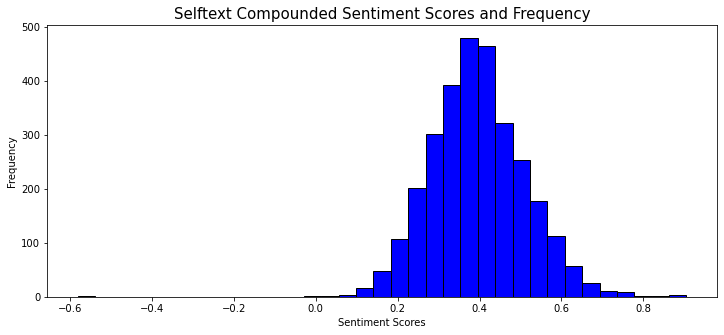

In [83]:
# Let's plot a histogram of cleantext compounded sentiment scores and frequency

# Size
plt.figure(figsize = (12,5))

plt.hist(subselftextsentbydate["selftextcompound"],
    color = "blue",
    ec = "black",
        bins=35)

plt.title('Selftext Compounded Sentiment Scores and Frequency',size=15)

plt.xlabel("Sentiment Scores")
plt.ylabel("Frequency");

# Create a descriptive title
# Do we need axis lables here?

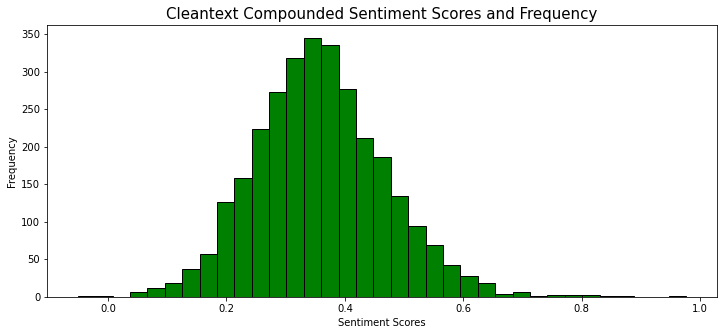

In [84]:
# Let's plot a histogram of cleantext compounded sentiment scores and frequency

# Size
plt.figure(figsize = (12,5))

plt.hist(subcleantextsentbydate["cleantextcompound"],
    color = "green",
    ec = "black",
        bins=35)

plt.title('Cleantext Compounded Sentiment Scores and Frequency',size=15)

plt.xlabel("Sentiment Scores")
plt.ylabel("Frequency");

# Create a descriptive title
# Do we need axis lables here?

In [85]:
import plotly.graph_objects as go

In [86]:
# Using graph_objects
df = subselftextsentbydate
fig = go.Figure([go.Scatter(x=df.index, y=df['selftextcompound'])])

fig.update_layout(
    title={
        'text': "Selftext General Sentiment Over Time By Day",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [87]:
# Using graph_objects
df = subcleantextsentbydate
fig = go.Figure([go.Scatter(x=df.index, y=df['cleantextcompound'])])

fig.update_layout(
    title={
        'text': "Cleantext General Sentiment Over Time By Day",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

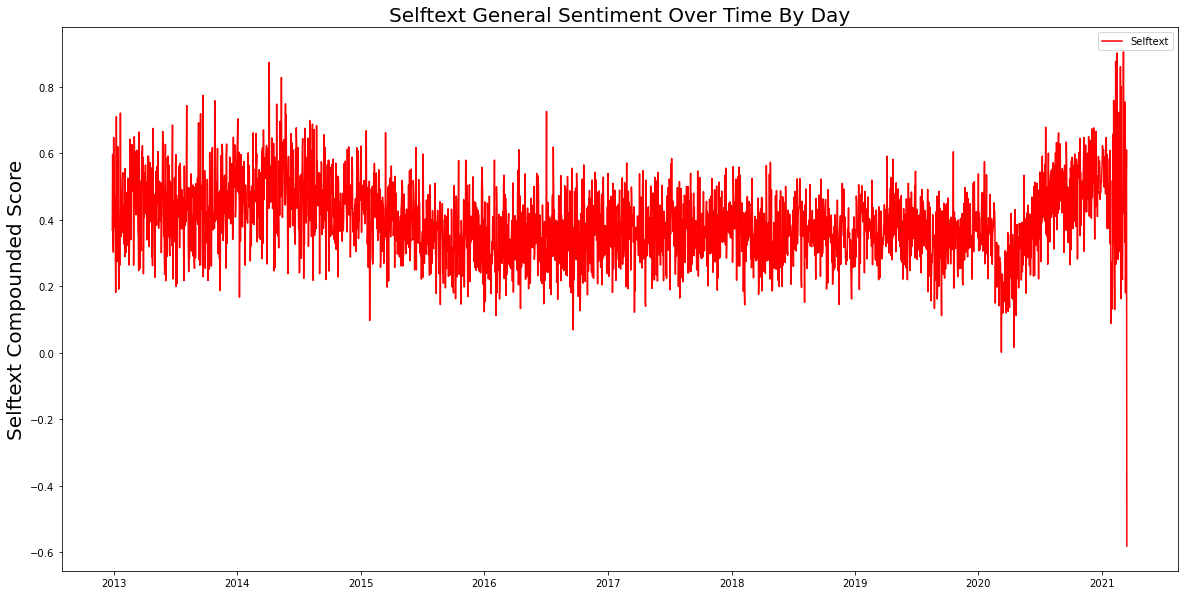

In [88]:
# Time-Series of Change in General Sentiment

# Size
plt.figure(figsize= (20,10))

# Line plot
plt.plot(subselftextsentbydate.index, subselftextsentbydate.selftextcompound, color = "red")

# Create a descriptive title
plt.title("Selftext General Sentiment Over Time By Day",size=20)

plt.legend(['Selftext'])

# Add axis labels
plt.ylabel("Selftext Compounded Score",size=20);

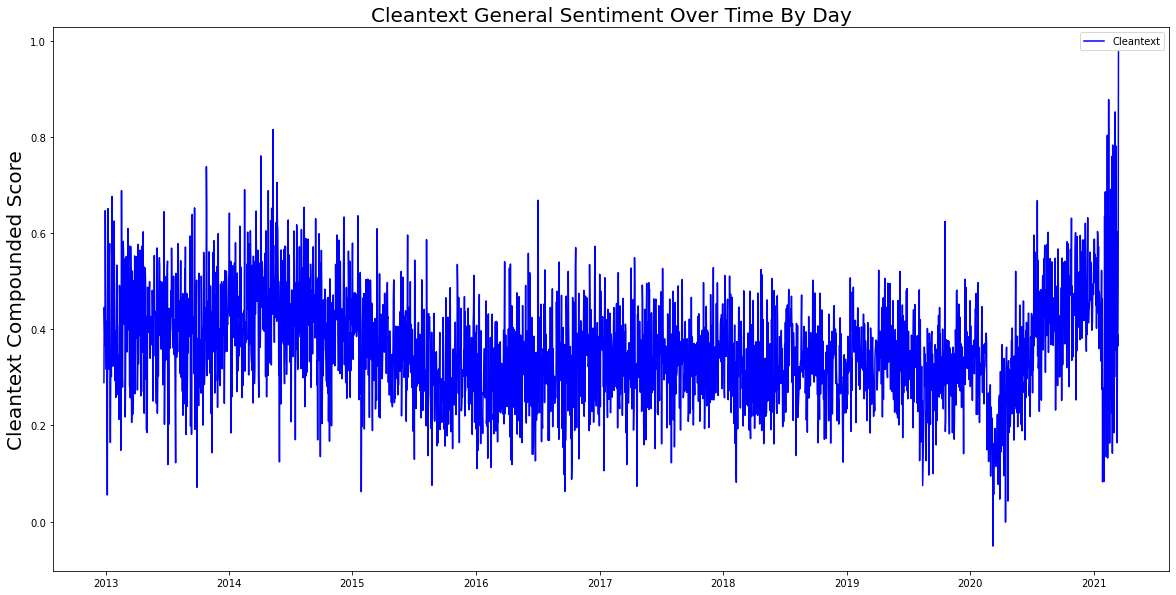

In [89]:
# Time-Series of Change in General Sentiment

# Size
plt.figure(figsize= (20,10))

# Line plot
plt.plot(subcleantextsentbydate.index, subcleantextsentbydate.cleantextcompound, color = "blue")

# Create a descriptive title
plt.title("Cleantext General Sentiment Over Time By Day",size=20)

plt.legend(['Cleantext'])

# Add axis labels
plt.ylabel("Cleantext Compounded Score",size=20);

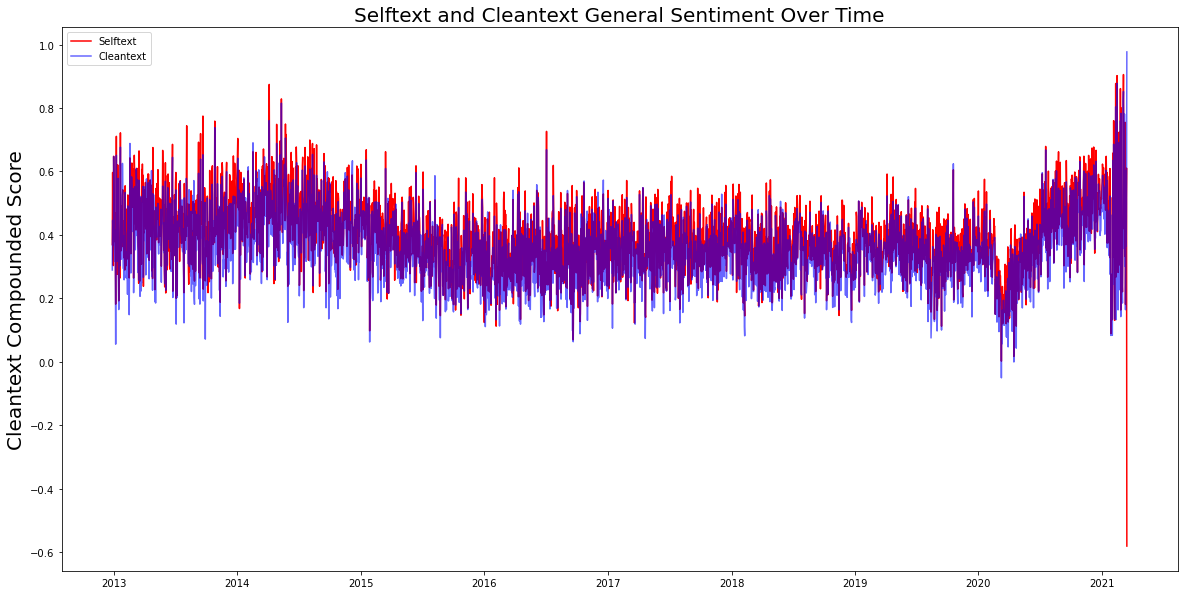

In [90]:
# Time-Series of Change in General Sentiment

# Size
plt.figure(figsize= (20,10))

# Line plot
plt.plot(subselftextsentbydate.index, subselftextsentbydate.selftextcompound, color = "red")
plt.plot(subcleantextsentbydate.index, subcleantextsentbydate.cleantextcompound, color = "blue",alpha=0.6)

# Create a descriptive title
plt.title("Selftext and Cleantext General Sentiment Over Time",size=20)

plt.legend(['Selftext','Cleantext'])

# Add axis labels
plt.ylabel("Cleantext Compounded Score",size=20);

In [91]:
subselftextsentbydate.head(4)

num_comments  redditscore  selftextwordcount  selftextnegative  \
timestamp                                                                    
2012-12-27      8.117647     2.588235          62.823529          0.061882   
2012-12-28      7.000000     6.555556         110.666667          0.030722   
2012-12-29     13.363636     4.636364         154.181818          0.068909   
2012-12-30     12.071429     4.071429          86.642857          0.048071   

            selftextneutral  selftextpositive  selftextcompound  
timestamp                                                        
2012-12-27         0.815824          0.122294          0.368947  
2012-12-28         0.870833          0.098500          0.596444  
2012-12-29         0.814455          0.116636          0.376118  
2012-12-30         0.828714          0.123214          0.303021

In [92]:
subselftextsenttest = subselftextsent.copy()

In [93]:
subcleantextsenttest = subcleantextsent.copy()

In [94]:
subselftextsentbyweek = subselftextsenttest.set_index('timestamp').resample('W').mean()

In [95]:
subselftextsentbyweek.to_csv('/home/ubuntu/0Data/subselftextsentbyweek.csv')

In [96]:
subcleantextsentbyweek = subcleantextsenttest.set_index('timestamp').resample('W').mean()

In [97]:
subcleantextsentbyweek.to_csv('/home/ubuntu/0Data/subcleantextsentbyweek.csv')

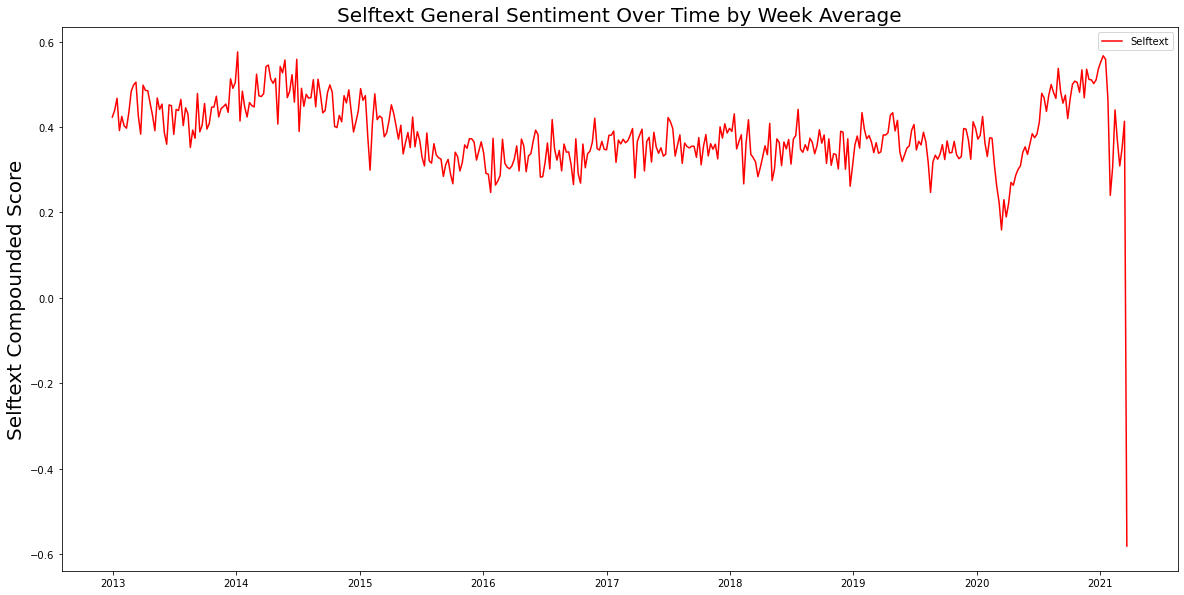

In [98]:
# Time-Series of Change in General Sentiment

# Size
plt.figure(figsize= (20,10))

# Line plot
plt.plot(subselftextsentbyweek.index, subselftextsentbyweek.selftextcompound, color = "red")

# Create a descriptive title
plt.title("Selftext General Sentiment Over Time by Week Average",size=20)

plt.legend(['Selftext'])

# Add axis labels
plt.ylabel("Selftext Compounded Score",size=20);

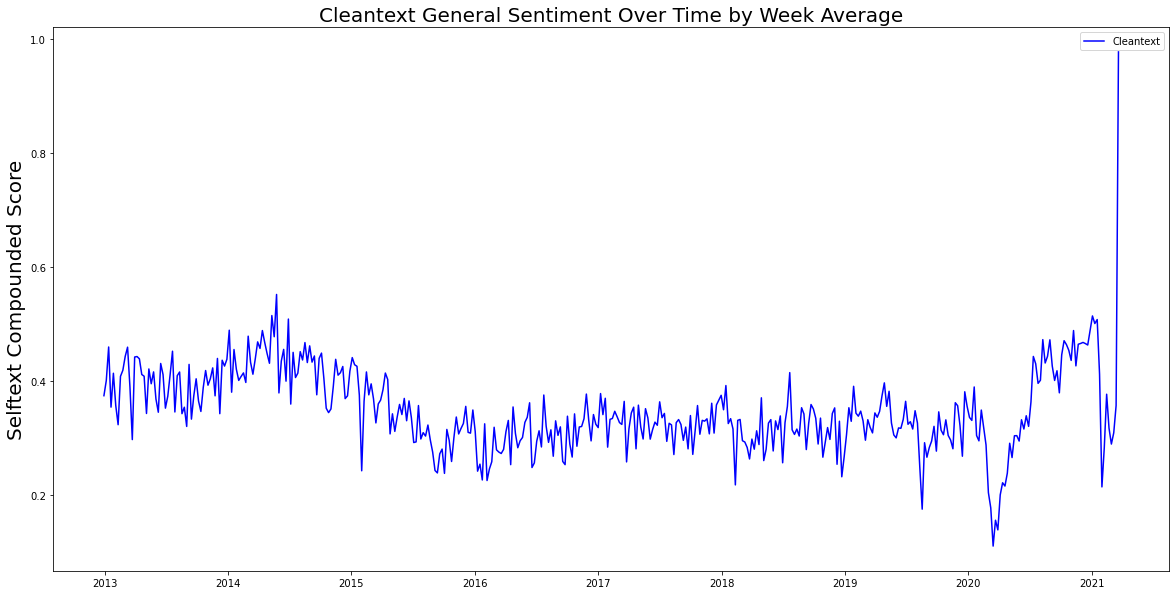

In [99]:
# Time-Series of Change in General Sentiment

# Size
plt.figure(figsize= (20,10))

# Line plot
plt.plot(subcleantextsentbyweek.index, subcleantextsentbyweek.cleantextcompound, color = "blue")

# Create a descriptive title
plt.title("Cleantext General Sentiment Over Time by Week Average",size=20)

plt.legend(['Cleantext'])

# Add axis labels
plt.ylabel("Selftext Compounded Score",size=20);

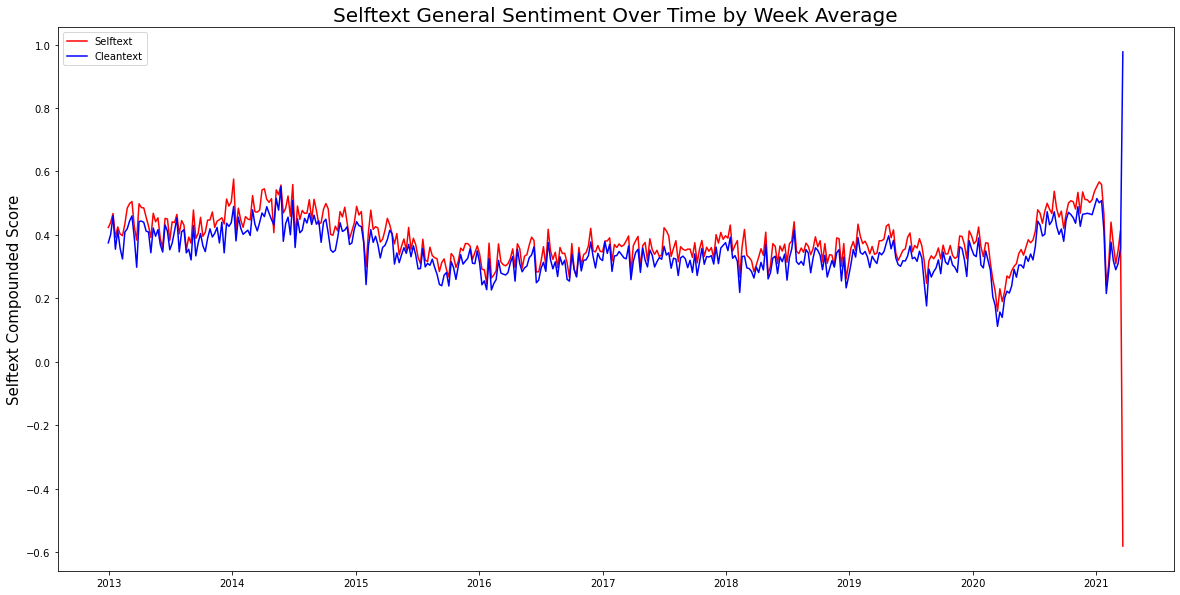

In [100]:
# Time-Series of Change in General Sentiment

# Size
plt.figure(figsize= (20,10))

# Line plot
plt.plot(subselftextsentbyweek.index, subselftextsentbyweek.selftextcompound, color = "red")
plt.plot(subcleantextsentbyweek.index, subcleantextsentbyweek.cleantextcompound, color = "blue")


# Create a descriptive title
plt.title("Selftext General Sentiment Over Time by Week Average",size=20)

plt.legend(['Selftext','Cleantext'])

# Add axis labels
plt.ylabel("Selftext Compounded Score",size=15);

In [101]:
# Using graph_objects
df = subselftextsentbyweek
fig = go.Figure([go.Scatter(x=df.index, y=df['selftextwordcount'])])

fig.update_layout(
    title={
        'text': "Self Text Wordcount Over Time By Week",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [102]:
subselftextsentbyweek.head(0)

Empty DataFrame
Columns: [num_comments, redditscore, selftextwordcount, selftextnegative, selftextneutral, selftextpositive, selftextcompound]
Index: []

In [103]:
# Using graph_objects
df = subselftextsentbyweek
fig = go.Figure([go.Scatter(x=df.index, y=df['num_comments'])])

fig.update_layout(
    title={
        'text': "Self Text Number of Comments Over Time By Week",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [104]:
# Using graph_objects
df = subselftextsentbyweek
fig = go.Figure([go.Scatter(x=df.index, y=df['redditscore'])])

fig.update_layout(
    title={
        'text': "Self Text Reddit Score Over Time By Week",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [105]:
subselftextsent.head()

timestamp                                              title  subreddit  \
0 2021-03-14                   Vanguard's poor ESG track record  investing   
1 2021-03-14  Daily Advice Thread - All basic help or advice...  investing   
2 2021-03-14  Daily General Discussion and spitballin thread...  investing   
3 2021-03-14     Comparing 2000 to today and potential outcomes  investing   
4 2021-03-14              Good Rx (GDRX) - is a GOOD investment  investing   

           author  num_comments  redditscore  \
0         Dazen91            15            1   
1   AutoModerator           160            1   
2   AutoModerator           293            1   
3  politiksnubben            32            1   
4   pandatears420            27            1   

                                            selftext  selftextwordcount  \
0  I know there's a huge consensus for vanguard f...                129   
1  If your question is "I have $10,000, what do I...                191   
2  Have a general question?  Want to offer some c...                136   
3  I have not seen many people who look into patt...                341   
4  On Friday (3/12/2021) GDRX fell sharply, at on...                293   

   selftextnegative  selftextneutral  selftextpositive  selftextcompound  \
0             0.069            0.771             0.160            0.8965   
1             0.023            0.889             0.088            0.9053   
2             0.000            0.851             0.149            0.9573   
3             0.047            0.870             0.083            0.9179   
4             0.073            0.746             0.181            0.9901   

         date  
0  2021-03-14  
1  2021-03-14  
2  2021-03-14  
3  2021-03-14  
4  2021-03-14

In [106]:
subselftextsents = subselftextsent[subselftextsent['subreddit'] == 'investing']
top5 = subselftextsents.sort_values(by='selftextpositive', ascending=False).head()
top5[['title','subreddit','selftext','selftextwordcount','selftextpositive']]

title  subreddit  \
47411                        TOBACCO: Where is the floor?  investing   
21885                              Flour - ~25% good buy?  investing   
47664     Who can share Blackrock’s leaked advisor sheet?  investing   
20226   Is there an app or site that lets me invest ve...  investing   
126217  I have 1800 dollars to invest - complete inves...  investing   

        selftext  selftextwordcount  selftextpositive  
47411         D:                  1               1.0  
21885        Yes                  1               1.0  
47664   Thanks!!                  1               1.0  
20226     Thanks                  1               1.0  
126217  Help! :)                  2               1.0

In [107]:
subselftextsents = subselftextsent[subselftextsent['subreddit'] == 'investing']
negative5 = subselftextsents.sort_values(by='selftextnegative', ascending=False).head()
negative5[['title','subreddit','selftext','selftextwordcount','selftextpositive']]

title  subreddit  \
101817                                 JESUS #$%#$5 #$%#$  investing   
114456  If you were to receive $50,000, how would you ...  investing   
39677    What is FAFSA gonna think of my Robinhood gains?  investing   
19946                  Bitcoin down 20% in the past hour.  investing   
65272   so, the market fell almost 2.5% today on virtu...  investing   

        selftext  selftextwordcount  selftextpositive  
101817    fuck!                   1               0.0  
114456  No debt.                  2               0.0  
39677   Stressed                  1               0.0  
19946    Brutal.                  1               0.0  
65272       wtf?                  1               0.0

In [108]:
subselftextsents = subselftextsent[subselftextsent['subreddit'] == 'wallstreetbets']
top5 = subselftextsents.sort_values(by='selftextpositive', ascending=False).head()
top5[['title','subreddit','selftext','selftextwordcount','selftextpositive']]

title       subreddit  \
138812  Bought $JNUG calls at the top. Please tell me ...  wallstreetbets   
140666                                         $TLRY puts  wallstreetbets   
151846                               UGAZ IGAZ WE ALL GAZ  wallstreetbets   
154427                                         Volkswagen  wallstreetbets   
151999  [PSA Alert] Something something consumer confi...  wallstreetbets   

       selftext  selftextwordcount  selftextpositive  
138812   Thanks                  1               1.0  
140666      lol                  1               1.0  
151846     YOLO                  1               1.0  
154427    yolo?                  1               1.0  
151999    Enjoy                  1               1.0

In [109]:
subselftextsents = subselftextsent[subselftextsent['subreddit'] == 'wallstreetbets']
negative5 = subselftextsents.sort_values(by='selftextnegative', ascending=False).head()
negative5[['title','subreddit','selftext','selftextwordcount','selftextpositive']]

title       subreddit  \
146569                                   Go SNAP tomorrow  wallstreetbets   
141568        Technical Analysts vs. Fundamental Analysts  wallstreetbets   
142456  What's wrong with $MU? All semis going up exce...  wallstreetbets   
149771                                  WHY IS WSB MOVING  wallstreetbets   
144596  Where to find the ADR level of a foreign compa...  wallstreetbets   

          selftext  selftextwordcount  selftextpositive  
146569  Seriously                   1               0.0  
141568      Fight.                  1               0.0  
142456   Seriously                  1               0.0  
149771      WTF???                  1               0.0  
144596  Seriously.                  1               0.0

In [110]:
subselftextsents = subselftextsent[subselftextsent['subreddit'] == 'SecurityAnalysis']
top5 = subselftextsents.sort_values(by='selftextpositive', ascending=False).head()
top5[['title','subreddit','selftext','selftextwordcount','selftextpositive']]

title         subreddit  \
159257  Anyone willing to help me out on my valuation ...  SecurityAnalysis   
161321      Anyone has the new Greenlight Capital letter?  SecurityAnalysis   
162755  Looking for a good book about investing in gol...  SecurityAnalysis   
160485  Hi, has anyone got the BAML “commercial aerosp...  SecurityAnalysis   
162283  Good summary London Value Investor Conference ...  SecurityAnalysis   

                selftext  selftextwordcount  selftextpositive  
159257              Pls.                  1               1.0  
161321               FYI                  1               1.0  
162755  please recommend                  2               1.0  
160485            Thanks                  1               1.0  
162283           Thanks!                  1               1.0

In [111]:
subselftextsents = subselftextsent[subselftextsent['subreddit'] == 'SecurityAnalysis']
negative5 = subselftextsents.sort_values(by='selftextnegative', ascending=False).head()
negative5[['title','subreddit','selftext','selftextwordcount','selftextnegative']]

title         subreddit  \
162951  Someone here recently asked about how to posit...  SecurityAnalysis   
164581  Anyone have any high quality UK stocks to reco...  SecurityAnalysis   
163097                             Greenblatt on indexing  SecurityAnalysis   
159606                        How many subs left for WSB?  SecurityAnalysis   
165196                      access control systems london  SecurityAnalysis   

                                                 selftext  selftextwordcount  \
162951  PDF warning\n\nhttp://csinvesting.org/wp-conte...                  3   
164581                    Panic in the streets. Etc......                  5   
163097  A sad day, isn't it.\n\nhttps://www.bloomberg....                  6   
159606  Serious question: WSB has totally destroyed th...                 16   
165196  access control system maintenance, burglar ala...                 17   

        selftextnegative  
162951             0.545  
164581             0.452  
163097             0.437  
159606             0.437  
165196             0.425

In [112]:
subselftextsents = subselftextsent[subselftextsent['subreddit'] == 'investing']
top5 = subselftextsents.sort_values(by='selftextpositive', ascending=False).head()
top5[['title','subreddit','selftext','selftextwordcount','selftextpositive']]

title  subreddit  \
47411                        TOBACCO: Where is the floor?  investing   
21885                              Flour - ~25% good buy?  investing   
47664     Who can share Blackrock’s leaked advisor sheet?  investing   
20226   Is there an app or site that lets me invest ve...  investing   
126217  I have 1800 dollars to invest - complete inves...  investing   

        selftext  selftextwordcount  selftextpositive  
47411         D:                  1               1.0  
21885        Yes                  1               1.0  
47664   Thanks!!                  1               1.0  
20226     Thanks                  1               1.0  
126217  Help! :)                  2               1.0

In [113]:
subselftextsents = subselftextsent[subselftextsent['subreddit'] == 'investing']
negative5 = subselftextsents.sort_values(by='selftextnegative', ascending=False).head()
negative5[['title','subreddit','selftext','selftextwordcount','selftextpositive']]

title  subreddit  \
101817                                 JESUS #$%#$5 #$%#$  investing   
114456  If you were to receive $50,000, how would you ...  investing   
39677    What is FAFSA gonna think of my Robinhood gains?  investing   
19946                  Bitcoin down 20% in the past hour.  investing   
65272   so, the market fell almost 2.5% today on virtu...  investing   

        selftext  selftextwordcount  selftextpositive  
101817    fuck!                   1               0.0  
114456  No debt.                  2               0.0  
39677   Stressed                  1               0.0  
19946    Brutal.                  1               0.0  
65272       wtf?                  1               0.0